# Time Series Objects
In this example we will explore the time series objects provided in MTH5.  This includes `mth5.timeseries.ChannelTS` and `mth5.timeseries.RunTS`.  Both of these are based on [xarray](http://xarray.pydata.org/) which allows us to easily index the data by time.  `xarray` also includes all the tools for querying, slicing, and indexing that one needs to work with the data.

## ChannelTS
A `ChannelTS` object is a container for a single channel.  The data are stored in an `xarray.DataArray` and indexed by time according to the metadata provided.  Here we will make a simple `electric` channel and look at how to interogate it.

In [1]:
%matplotlib inline
import numpy as np
from mth5.timeseries import ChannelTS
from mt_metadata.timeseries import Electric, Run, Station

2021-11-17 18:57:34,786 [line 135] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\Documents\GitHub\mth5\logs\mth5_debug.log


Here create some metadata, the keys are the `time_period.start` and the `sample_rate`. 

In [2]:
ex_metadata = Electric()
ex_metadata.time_period.start = "2020-01-01T00:00:00"
ex_metadata.sample_rate = 1.0
ex_metadata.component = "ex"
ex_metadata.dipole_length = 100.
ex_metadata.units = "millivolts"

Create `Station` and `Run` metadata

In [3]:
station_metadata = Station(id="mt001")
run_metadata = Run(id="001")

Create "realistic" data 

In [4]:
n_samples = 4096
t = np.arange(n_samples)
data = np.sum([np.cos(2*np.pi*w*t + phi) for w, phi in zip(np.logspace(-3, 3, 20), np.random.rand(20))], axis=0)

In [5]:
ex = ChannelTS(channel_type="electric",
              data=data,
              channel_metadata=ex_metadata,
              run_metadata=run_metadata,
              station_metadata=station_metadata)

In [6]:
ex

Channel Summary:
	Station:      mt001
	Run:          001
	Channel Type: electric
	Component:    ex
	Sample Rate:  1.0
	Start:        2020-01-01T00:00:00+00:00
	End:          2020-01-01T01:08:15+00:00
	N Samples:    4096

## Get a slice of the data
Here we will provide a start time of the slice and the number of samples that we want the slice to be


In [7]:
ex_slice = ex.get_slice("2020-01-01T00:00:00", n_samples=256)

In [8]:
ex_slice

Channel Summary:
	Station:      mt001
	Run:          001
	Channel Type: electric
	Component:    ex
	Sample Rate:  1.0
	Start:        2020-01-01T00:00:00+00:00
	End:          2020-01-01T00:04:15+00:00
	N Samples:    256

## Plot the data
This is a work in progress, but this can be done through the `xarray` container.

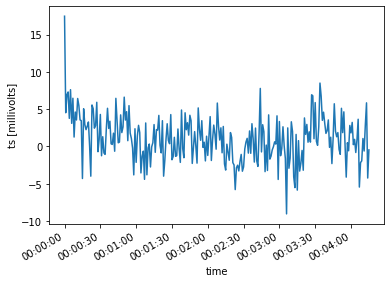

In [9]:
ex_slice._ts.plot()

## Convert to an `xarray`
We can convert the `ChannelTS` object to an `xarray.DataArray` which could be easier to use.

In [10]:
ex_xarray = ex.to_xarray()

In [11]:
ex_xarray

<xarray.DataArray 'ts' (time: 4096)>
array([ 17.46420664,   4.51187244,   6.93993994, ...,  -3.0286192 ,
         2.04953847,   4.08110871])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-01T01:08:15
Attributes: (12/27)
    channel_number:             None
    component:                  ex
    data_quality.rating.value:  0
    dipole_length:              100.0
    filter.applied:             [False]
    filter.name:                ['none']
    ...                         ...
    time_period.end:            2020-01-01T01:08:15+00:00
    time_period.start:          2020-01-01T00:00:00+00:00
    type:                       electric
    units:                      millivolts
    station.id:                 mt001
    run.id:                     001

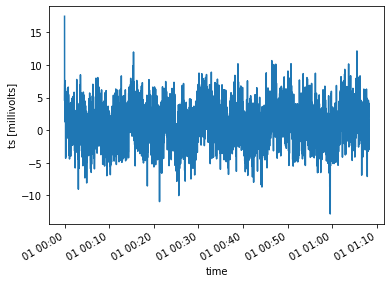

In [12]:
ex_xarray.plot()

## Convert to an Obspy.Trace object
The `ChannelTS` object can be converted to an `obspy.Trace` object.  This can be useful when dealing with data received from a mainly seismic archive like IRIS.  This can also be useful for using some tools provided by [Obspy](https://docs.obspy.org/).

In [13]:
ex.station_metadata.fdsn.id = "mt001"
ex.channel
ex_trace = ex.to_obspy_trace()

AttributeError: 'ChannelTS' object has no attribute 'channel'

In [ ]:
ex_trace

## Convert from an Obspy.Trace object
We can reverse that and convert an `obspy.Trace` into a `ChannelTS`.  Again useful when dealing with seismic dominated archives.

In [ ]:
ex_from_trace = ex.from_obspy_trace(ex_trace)

In [ ]:
ex_trace.stats